In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv(r'train_processed.csv')
df

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.07

In [5]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV,train_test_split

In [6]:
y = df['SalePrice']
x = df.drop(['SalePrice','Id'],axis=1)

In [7]:
lasso = Lasso()

In [8]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}


In [9]:
# grid_search = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
#grid_search.fit(x,y)

In [10]:
#grid_search.best_params_

In [11]:
# grid_search.best_estimator_

In [12]:
#selecting the important features
feat_selec = SelectFromModel(Lasso(alpha=0.001,random_state=0))
feat_selec.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [13]:
#to see which features are important
feat_selec.get_support()

array([ True,  True, False,  True, False, False,  True,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False])

In [14]:
selected_fea = x.columns[(feat_selec.get_support())]
selected_fea

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [15]:
#so considering only those important features
x = x[selected_fea]

In [16]:
x

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,ScreenPorch,YrSold,SaleCondition
0,0.235294,0.75,0.366344,0.000000,0.333333,0.00,0.636364,0.4,0.666667,0.500,0.036765,0.098361,0.0,1.0,0.50,0.666667,1.00,0.75,0.25,0.064212,1.00,1.0,0.356155,0.413559,0.577712,0.333333,0.666667,0.5,0.666667,1.00,0.000000,0.2,0.8,0.666667,0.50,1.0,1.0,0.000000,0.0,0.50,0.75
1,0.000000,0.75,0.391317,0.000000,0.333333,0.50,0.500000,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.4,0.25,0.333333,0.50,0.75,1.00,0.121575,1.00,1.0,0.503056,0.000000,0.470245,0.000000,0.666667,0.0,0.333333,1.00,0.333333,0.6,0.8,0.666667,0.50,1.0,1.0,0.347725,0.0,0.25,0.75
2,0.235294,0.75,0.422359,0.333333,0.333333,0.00,0.636364,0.4,0.666667,0.500,0.051471,0.114754,0.0,1.0,0.50,0.666667,1.00,0.75,0.50,0.185788,1.00,1.0,0.383441,0.419370,0.593095,0.333333,0.666667,0.5,0.666667,1.00,0.333333,0.6,0.8,0.666667,0.50,1.0,1.0,0.000000,0.0,0.50,0.75
3,0.294118,0.75,0.390295,0.333333,0.333333,0.25,0.727273,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.2,0.25,0.333333,0.25,0.50,0.25,0.231164,0.75,1.0,0.399941,0.366102,0.579157,0.333333,0.333333,0.0,0.666667,1.00,0.333333,0.8,0.4,0.333333,0.75,1.0,1.0,0.000000,0.0,0.00,0.00
4,0.235294,0.75,0.468761,0.333333,0.333333,0.50,1.000000,0.4,0.777778,0.500,0.058824,0.147541,0.0,1.0,0.50,0.666667,1.00,0.75,0.75,0.209760,1.00,1.0,0.466237,0.509927,0.666523,0.333333,0.666667,0.5,0.666667,1.00,0.333333,0.6,0.8,0.666667,0.75,1.0,1.0,0.224037,0.0,0.50,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.353592,0.000000,0.333333,0.00,0.590909,0.4,0.555556,0.500,0.058824,0.131148,0.0,1.0,0.25,0.333333,1.00,0.75,0.25,0.407962,1.00,1.0,0.396777,0.336077,0.564433,0.000000,0.666667,0.5,0.333333,1.00,0.333333,0.6,0.8,0.666667,0.50,1.0,1.0,0.000000,0.0,0.25,0.75
1456,0.000000,0.75,0.453273,0.000000,0.333333,0.00,0.545455,0.4,0.555556,0.625,0.235294,0.377049,0.0,0.7,1.00,0.333333,0.50,0.75,0.25,0.252140,0.50,1.0,0.690872,0.000000,0.645810,0.333333,0.666667,0.0,0.333333,0.75,0.666667,0.6,0.8,0.333333,0.50,1.0,1.0,0.407235,0.0,1.00,0.75
1457,0.294118,0.75,0.379597,0.000000,0.333333,0.00,0.727273,0.4,0.666667,1.000,0.507353,0.081967,0.0,0.9,0.25,1.000000,0.75,0.50,0.25,0.375428,1.00,1.0,0.480189,0.557869,0.688669,0.000000,0.666667,0.0,0.666667,1.00,0.666667,0.8,0.8,0.666667,0.25,1.0,1.0,0.000000,0.0,1.00,0.75
1458,0.000000,0.75,0.393688,0.000000,0.333333,0.00,0.363636,0.4,0.444444,0.625,0.441176,0.245902,1.0,0.4,0.25,0.333333,0.50,0.50,0.50,0.000000,0.75,1.0,0.443419,0.000000,0.414497,0.333333,0.333333,0.0,0.666667,1.00,0.000000,0.2,0.8,0.333333,0.25,1.0,1.0,0.427071,0.0,1.00,0.75


In [17]:
#splitting to train and test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
x_train

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,ScreenPorch,YrSold,SaleCondition
618,0.000000,0.75,0.429934,0.000000,0.333333,0.00,0.954545,0.4,0.888889,0.50,0.000000,0.016393,1.0,0.9,0.50,1.000000,1.00,1.00,0.75,0.759418,1.00,1.0,0.643275,0.000000,0.601318,0.000000,0.666667,0.0,0.666667,1.00,0.333333,0.8,0.8,0.333333,0.75,1.0,1.0,0.000000,0.541667,0.25,1.00
870,0.000000,0.75,0.317983,0.000000,0.333333,0.00,0.363636,1.0,0.444444,0.50,0.345588,0.786885,1.0,0.4,0.25,0.333333,0.50,0.50,0.25,0.382705,0.75,0.0,0.372592,0.000000,0.348290,0.000000,0.333333,0.0,0.333333,1.00,0.000000,0.2,0.4,0.333333,0.25,1.0,1.0,0.000000,0.000000,0.75,0.75
92,0.058824,0.75,0.456002,0.333333,1.000000,0.00,0.727273,0.4,0.444444,0.75,0.647059,0.065574,0.0,0.2,0.25,0.333333,0.25,0.75,0.25,0.069777,1.00,1.0,0.401121,0.000000,0.374958,0.333333,0.333333,0.0,0.333333,1.00,0.000000,0.2,0.4,0.333333,0.50,1.0,1.0,0.000000,0.000000,0.75,0.75
817,0.000000,0.75,0.454605,0.333333,0.333333,1.00,0.409091,0.4,0.777778,0.50,0.044118,0.114754,1.0,0.9,0.50,0.666667,1.00,0.75,0.25,0.149829,1.00,1.0,0.613346,0.000000,0.573341,0.333333,0.666667,0.0,0.666667,1.00,0.666667,0.8,0.8,0.666667,0.75,1.0,1.0,0.175029,0.000000,0.50,0.75
302,0.000000,0.75,0.460977,0.333333,0.333333,0.25,0.636364,0.4,0.666667,0.50,0.036765,0.081967,0.0,1.0,0.50,0.666667,1.00,0.75,0.25,0.659675,1.00,1.0,0.578642,0.000000,0.540900,0.000000,0.666667,0.0,0.666667,1.00,0.333333,0.6,0.8,0.666667,0.75,1.0,1.0,0.546091,0.000000,0.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.235294,0.75,0.387820,0.000000,0.333333,0.00,1.000000,0.4,0.777778,0.50,0.073529,0.180328,0.0,1.0,0.50,0.666667,1.00,0.75,0.50,0.038099,1.00,1.0,0.504851,0.531235,0.692428,0.333333,0.666667,0.5,0.666667,1.00,0.333333,0.8,0.8,0.666667,0.75,1.0,1.0,0.000000,0.375000,0.75,0.75
835,0.000000,0.75,0.391317,0.000000,0.333333,0.00,0.272727,0.4,0.333333,0.75,0.441176,0.262295,0.0,1.0,0.25,0.333333,0.50,0.75,0.25,0.267551,0.50,1.0,0.439537,0.000000,0.410869,0.000000,0.666667,0.0,0.666667,0.25,0.000000,0.2,0.8,0.333333,0.50,1.0,1.0,0.338390,0.000000,1.00,0.75
1216,0.411765,0.25,0.377157,0.000000,0.333333,0.00,0.272727,0.6,0.555556,0.50,0.235294,0.540984,0.0,1.0,0.25,0.333333,0.00,0.00,0.00,0.000000,0.50,1.0,0.519487,0.282809,0.615356,0.000000,0.666667,0.0,0.333333,1.00,0.000000,0.2,0.8,0.333333,0.50,1.0,1.0,0.000000,0.000000,1.00,0.75
559,0.588235,0.75,0.176055,0.000000,0.333333,0.00,0.681818,0.4,0.666667,0.50,0.022059,0.049180,0.0,1.0,0.50,0.666667,1.00,0.75,1.00,0.588185,1.00,1.0,0.582551,0.000000,0.544554,0.000000,0.666667,0.0,0.666667,1.00,0.333333,0.6,0.8,1.000000,0.50,1.0,1.0,0.166861,0.000000,0.00,0.75


In [19]:
#training the lasso regression model with the selected features
l = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
l.fit(x_train,y_train)

Lasso(alpha=0.001)

In [21]:
y_pred = l.predict(x_test)

In [22]:
x_test

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,ScreenPorch,YrSold,SaleCondition
529,0.000000,0.75,0.630999,0.333333,0.333333,1.00,0.727273,0.4,0.555556,0.250,0.367647,0.540984,1.0,0.2,0.75,0.666667,1.00,0.50,0.25,0.349315,0.50,1.0,0.764014,0.000000,0.714182,0.333333,1.000000,0.0,0.333333,0.0,0.666667,0.6,0.8,0.666667,0.50,1.0,1.0,0.000000,0.000000,0.25,0.25
491,0.176471,0.75,0.389061,0.000000,0.333333,0.00,0.363636,0.0,0.555556,0.750,0.477941,0.934426,0.0,0.2,0.25,0.333333,0.50,0.50,0.25,0.101884,0.50,1.0,0.398758,0.300242,0.549294,0.333333,0.333333,0.0,0.000000,1.0,0.666667,0.6,0.8,0.333333,0.25,1.0,1.0,0.000000,0.000000,0.00,0.75
459,0.176471,0.75,0.329918,0.333333,0.000000,0.25,0.136364,0.4,0.444444,0.375,0.433824,0.983607,0.0,0.4,0.00,0.333333,0.50,0.50,0.25,0.224315,0.50,1.0,0.406964,0.108475,0.453307,0.333333,0.333333,0.0,0.666667,1.0,0.333333,0.6,0.4,0.333333,0.25,1.0,1.0,0.000000,0.000000,0.75,0.75
279,0.235294,0.75,0.399404,0.000000,0.333333,0.00,0.772727,0.4,0.666667,0.500,0.227941,0.524590,1.0,0.7,0.50,0.333333,0.50,0.75,0.25,0.328767,1.00,1.0,0.469855,0.419370,0.636999,0.000000,0.666667,0.5,0.333333,1.0,0.333333,0.6,0.8,1.000000,0.50,1.0,1.0,0.336056,0.000000,0.50,0.75
655,0.823529,0.25,0.050188,0.000000,0.333333,0.00,0.090909,0.4,0.555556,0.500,0.286765,0.655738,0.0,0.6,0.50,0.333333,0.50,0.50,0.25,0.224743,0.50,1.0,0.171149,0.274576,0.419061,0.000000,0.333333,0.5,0.333333,1.0,0.000000,0.2,0.4,0.333333,0.25,1.0,1.0,0.000000,0.000000,1.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.588235,0.75,0.415201,0.333333,0.333333,1.00,0.500000,0.4,0.777778,0.500,0.110294,0.262295,0.0,0.8,0.25,0.666667,1.00,0.75,1.00,0.042808,1.00,1.0,0.620009,0.000000,0.579569,0.666667,0.333333,0.5,0.666667,1.0,0.666667,0.8,0.8,1.000000,0.50,1.0,1.0,0.142357,0.000000,0.50,0.75
440,0.000000,0.75,0.484207,0.000000,0.333333,0.00,0.954545,0.4,1.000000,0.500,0.007353,0.032787,1.0,1.0,1.00,1.000000,1.00,1.00,1.00,0.337329,1.00,1.0,0.746617,0.000000,0.697920,0.333333,0.666667,0.0,1.000000,1.0,0.666667,0.8,0.8,1.000000,0.75,1.0,1.0,0.000000,0.354167,0.75,0.75
1387,0.176471,0.25,0.367959,0.000000,0.333333,0.00,0.181818,0.0,0.555556,0.750,0.669118,0.950820,0.0,0.5,0.25,0.333333,0.25,0.50,0.25,0.000000,0.50,0.0,0.607703,0.417433,0.715726,0.000000,0.666667,0.0,0.666667,1.0,0.333333,0.8,0.4,0.333333,0.25,1.0,1.0,0.102684,0.000000,0.25,0.50
1323,0.058824,0.75,0.276154,0.000000,1.000000,0.00,0.136364,0.4,0.333333,0.750,0.507353,0.983607,1.0,1.0,0.25,0.000000,0.50,0.50,0.25,0.059932,0.75,1.0,0.284318,0.000000,0.265774,0.000000,0.333333,0.0,0.000000,1.0,0.000000,0.2,0.0,0.000000,0.00,0.0,1.0,0.191365,0.000000,0.75,0.75


Test RMSE

In [23]:
#calculating the root mean squre error
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14490773294644244

In [24]:
# from sklearn.metrics import r2_score
# r2_test = r2_score(y_test, y_pred)

In [25]:
#train score
y_pred_train = l.predict(x_train)

Train RMSE

In [26]:
#train rmse
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.11835118842421347

In [27]:
# r2_train = r2_score(y_train,y_pred_train)
# r2_train

C:\Users\TEKANA\Anaconda3\envs\TAP_project\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8613059907717286

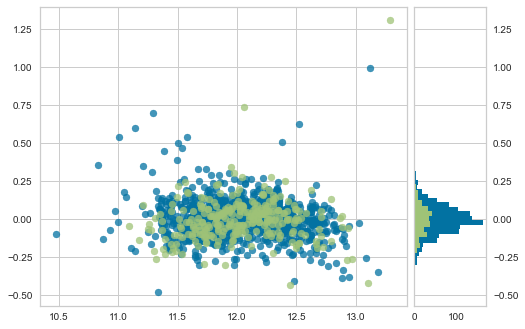

In [28]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(l)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)


In [29]:
ypred_norm = np.expm1(l.predict(x_test))

In [30]:
ytest_norm = np.expm1(y_test)

In [31]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

37983.71527251271

In [32]:
ytrain_norm = np.expm1(y_train)

In [33]:
ypred_train_norm = np.expm1(l.predict(x_train))

In [34]:
#train rmse
np.sqrt(mean_squared_error(ytrain_norm,ypred_train_norm))

25445.935221307205

In [35]:
ytest_norm.describe()

count       292.000000
mean     181369.383562
std       83244.107342
min       66999.000000
25%      128874.000000
50%      163949.000000
75%      203572.750000
max      744999.000000
Name: SalePrice, dtype: float64

In [36]:
(ypred_norm - ytest_norm).abs().describe()

count       292.000000
mean      18352.372805
std       33312.963906
min          32.781145
25%        5726.725280
50%       11164.235010
75%       20715.403653
max      431591.725869
Name: SalePrice, dtype: float64

In [37]:
pd.Series(ypred_norm).describe()

count       292.000000
mean     179796.968569
std       74373.546075
min       65536.548684
25%      126743.099465
50%      165092.269258
75%      213272.649859
max      591590.725869
dtype: float64

(0.0, 400000.0)

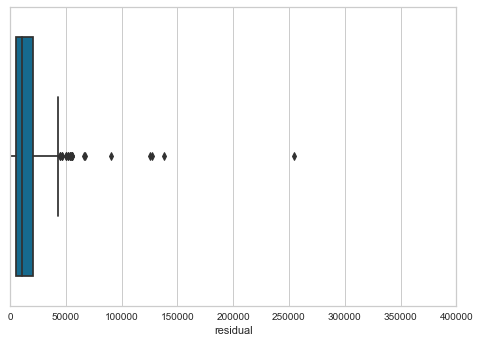

In [38]:
sns.boxplot(x=(ypred_norm - ytest_norm).abs(),data=df)
plt.xlabel("residual")
plt.xlim(0,400000)
#it is also somewhat close to zero